Practica 3 
Parte 1 -  Análisis estadístico en señales ECG

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy import stats
from statsmodels.tsa.stattools import adfuller

Implemente una función que permita calcular el valor cuadrático medio (RMS) de una señal.

In [90]:
def RMS(N,x):
    """
    Calcula el valor cuadrático medio (RMS) de una señal dada.
    
    Parámetros:
    N (int): Número de muestras en la señal (longitud de la lista `x`).
    x (list or array-like): Lista o array que contiene los valores de la señal.

    Retorna:
    float: El valor RMS de la señal.
    """ 
    c=0 # Inicializa el contador para la sumatoria

    # Itera a través de cada valor en la señal, hasta N
    for i in range(N+1):
        rms=x[i]**2
        c=c+rms
    # Calcula el valor RMS: raíz cuadrada de la media de los cuadrados
    xrms=((1/N)*c)**(1/2)

    return RMS # Devuelve el valor RMS calculado

Leer los datos

In [91]:
# Cargar el archivo .mat
data = scipy.io.loadmat('signals.mat')

# Iterar sobre cada llave en el diccionario y mostrar el número de datos
for key in data:
    # Omitir llaves internas que empiezan con '__'
    if not key.startswith('__'):
        # Obtener la forma (shape) del array asociado a la llave
        shape = data[key].shape
        num_elements = data[key].size  # Número de elementos totales
        print(f"{key}, Dimensiones: {shape}, Número de elementos: {num_elements}")

def xrms(N,signal):
    signal = np.array(signal)
    rms_value = np.sqrt((1/N)*np.mean(signal**2))
    return rms_value

Fs, Dimensiones: (1, 1), Número de elementos: 1
ECG_asRecording, Dimensiones: (1, 30720), Número de elementos: 30720
ECG_filtered, Dimensiones: (1, 30720), Número de elementos: 30720
EMG_filtered1, Dimensiones: (1, 30721), Número de elementos: 30721
EMG_filtered2, Dimensiones: (1, 30721), Número de elementos: 30721
EMG_asRecording1, Dimensiones: (1, 30721), Número de elementos: 30721
EMG_asRecording2, Dimensiones: (1, 30721), Número de elementos: 30721


•	A partir de la información suministrada en el archivo .mat, determine el tiempo de duración de las señales, cree un vector de tiempo. 

In [92]:
# Frecuencia de muestreo
Fs=data['Fs'][0][0]

# Número de muestras en la señal 
N=np.shape(data['ECG_asRecording'])[1] 

# Vector de tiempo
t=np.linspace(0,(N/Fs),N)

# Asegurar que el vector de tiempo tenga el mismo número de elementos que la señal
if t.shape[0] > N:
    t = t[:N]

print(t.shape)

(30720,)


•	Grafique la señal sin filtrar y filtrada, compárelas. Comente lo que observa, y describa cómo debe ser el comportamiento del filtro que se utilizó. Recuerde las frecuencias de interés de la señal ECG.

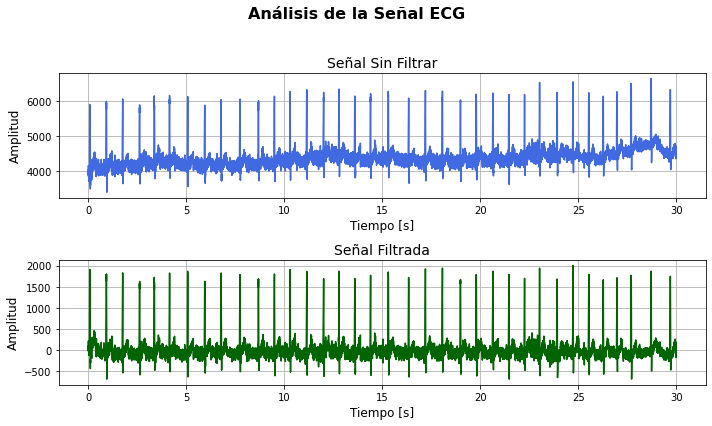

In [93]:
# Configuraciones globales de la gráfica
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.suptitle('Análisis de la Señal ECG', fontsize=16, fontweight='bold')  # Título global

# Primera subgráfica: Señal sin filtrar
plt.subplot(211)
plt.plot(t, data['ECG_asRecording'][0], color='royalblue', linestyle='-', linewidth=1.5)
plt.title('Señal Sin Filtrar', fontsize=14)
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.grid(True)  # Añadir cuadrícula para mejor visualización

# Segunda subgráfica: Señal filtrada
plt.subplot(212)
plt.plot(t, data['ECG_filtered'][0], color='darkgreen', linestyle='-', linewidth=1.5)
plt.title('Señal Filtrada', fontsize=14)
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.grid(True)  # Añadir cuadrícula para mejor visualización

# Ajustar el espacio entre subgráficas para evitar superposiciones
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste adicional para no superponer con el título global
plt.show()

•	Análisis

La señal sin filtrar muestra un comportamiento típico de un registro de ECG, con alta variabilidad en las amplitudes, incluyendo picos agudos que corresponden a los complejos QRS. Existe una variación considerable en la línea de base, lo que indica la presencia de ruido de baja frecuencia, probablemente debido a interferencias de la línea de alimentación o al movimiento del paciente. Además, se observan componentes de alta frecuencia que podrían estar relacionados con artefactos electromiográficos o ruido eléctrico. Después de aplicar el filtro, la señal evidencia una reducción significativa en la variabilidad de la línea de base, lo que indica que el filtro ha sido eficaz en la eliminación del ruido de baja frecuencia. Los picos correspondientes a los complejos QRS se mantienen claramente visibles. La reducción de los componentes de alta frecuencia también es evidente, lo que indica que el filtro ha sido eficaz en atenuar el ruido de alta frecuencia, mejorando la calidad del registro sin eliminar las características fisiológicas esenciales de la señal.

•	Tome la señal tal cual se registró. De dicha señal, seleccione un ciclo cardiaco, grafique. Calcule el promedio, el valor RMS, la varianza y la desviación estándar del ciclo. Analice los resultados.

Promedio: 4111.2989
Valor RMS: 137.3677
Varianza: 80128.3408
Desviación Estándar: 283.0695


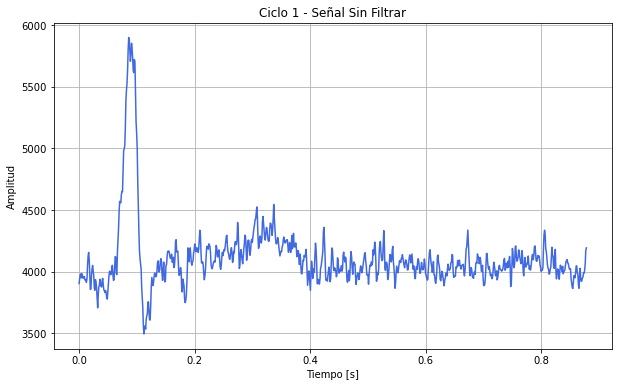

In [94]:
asRecorded=data['ECG_asRecording'][0] #Señal sin filtro
num_muestras=900 #Mediciones por ciclo

def graf_signal(muestras, signal, nombre):
    """
    Grafica el ciclo de una señal y calcula estadísticas.
    Parámetros:
    muestras (int): Número de muestras que conforman un ciclo.
    signal (array-like): La señal completa.
    nombre (str): Nombre para el título de la gráfica.
    """
    # Extrae las muestras del ciclo
    ciclo1 = signal[:muestras]  
    tciclo = t[:muestras]  # Tiempo correspondiente a las muestras
    
    # Crear la gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(tciclo, ciclo1, color='royalblue')
    plt.title(f'Ciclo 1 - {nombre}')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.grid(True)
    
    # Calcular estadísticas
    mean_ciclo1 = np.mean(ciclo1)
    rms_ciclo1 = xrms(muestras, ciclo1)
    var_ciclo1 = np.var(ciclo1)
    std_ciclo1 = np.std(ciclo1)
    
    # Imprimir resultados
    print(f'Promedio: {mean_ciclo1:.4f}')
    print(f'Valor RMS: {rms_ciclo1:.4f}')
    print(f'Varianza: {var_ciclo1:.4f}')
    print(f'Desviación Estándar: {std_ciclo1:.4f}')
    
    plt.show()

# Llamar a la función para graficar y calcular estadísticas
graf_signal(num_muestras, asRecorded, "Señal Sin Filtrar")

•	Tome la señal filtrada. Repita el procedimiento anterior con esta señal, compare con los resultados obtenidos en el ítem anterior. 

Promedio: 74.9549
Valor RMS: 10.4262
Varianza: 92217.7719
Desviación Estándar: 303.6738


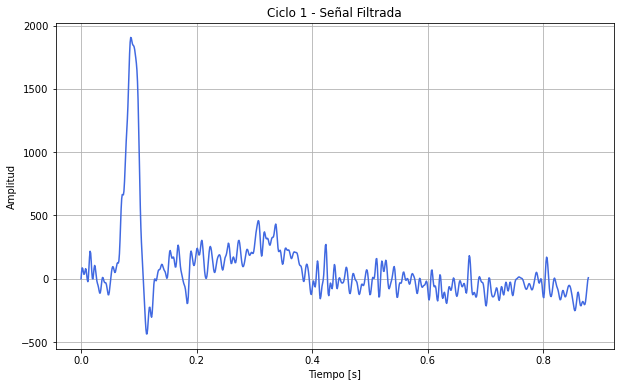

In [95]:
Filtered=data['ECG_filtered'][0]
graf_signal(num_muestras,Filtered,"Señal Filtrada")

•	Extraiga 15 ciclos de la señal filtrada, y para cada ciclo calcule el valor promedio y la varianza, grafique cada ciclo, y analice (gráfica y estadísticamente). ¿Se puede considerar que la señal es estacionaria? 

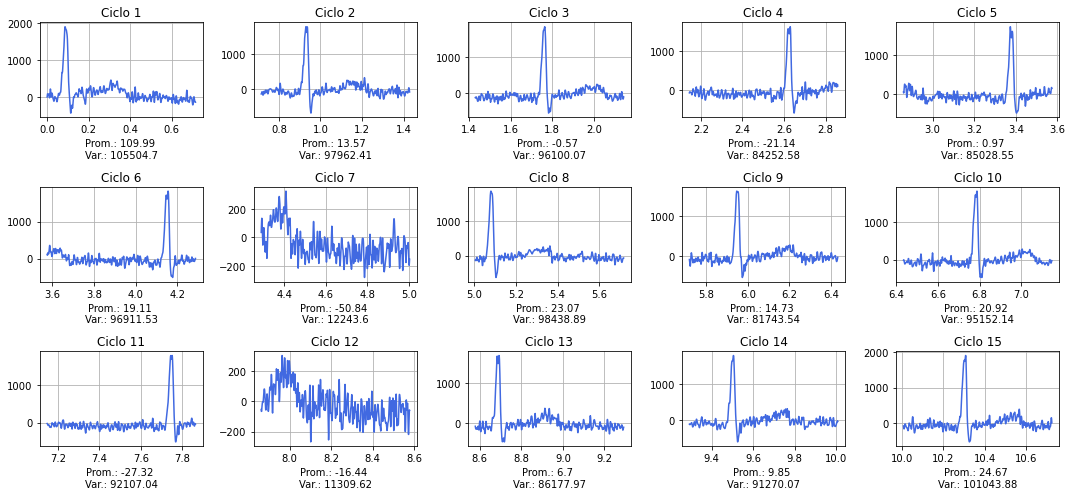

In [96]:
# Parámetros
num_muestras = 732  # Número de muestras por ciclo
N_ciclos = 15       # Número total de ciclos
ciclos = []         # Lista para almacenar los ciclos

# Crear una figura con un tamaño específico
plt.figure(figsize=(15, 7))

# Procesar y graficar cada ciclo
for i in range(N_ciclos):
    # Extraer el rango de tiempo y señal para el ciclo actual
    i_t = t[num_muestras*i:num_muestras*(i+1)]
    i_ciclo = Filtered[num_muestras*i:num_muestras*(i+1)]
    
    # Calcular estadísticas
    i_mean = np.round(np.mean(i_ciclo), 2)
    i_var = np.round(np.var(i_ciclo), 2)
    
    # Almacenar el ciclo en la lista
    ciclos.append(i_ciclo)
    
    # Graficar el ciclo
    plt.subplot(3, 5, i+1)
    plt.plot(i_t, i_ciclo, color='royalblue')
    plt.title(f'Ciclo {i+1}')
    plt.xlabel(f'Prom.: {i_mean} \nVar.: {i_var}')
    plt.grid(True)  # Añadir cuadrícula para mejor visualización

# Ajustar el diseño de la gráfica

plt.tight_layout()
plt.show()

•	Realice dos veces comparaciones entre dos ciclos cualquiera utilizando una prueba t. Determine estadísticamente si existe diferencia estadística entre los ciclos, Compruebe los supuestos necesarios para realizar una prueba t, esto es: Normalidad de la variable, independencia (se asume que los grupos son independientes), y homocedasticidad (use una prueba de Levene), finalmente realice la prueba t para determinar si existen diferencias entre los ciclos. Qué indica este análisis respecto de la estacionariedad, explique. De no cumplirse los requisitos, realice entonces un análisis no paramétrico (prueba U de Mann-Whitney).

In [97]:
"""Prueba de normalidad"""
# Parámetros
alpha = 0.05  # Nivel de significancia del 5%
ciclos_num = [2, 6, 10, 14]  # Índices de los ciclos a evaluar

# Realizar prueba de normalidad para ciclos específicos
for i in ciclos_num:
    # Extraer el ciclo correspondiente
    ciclo = ciclos[i]
    
    # Realizar la prueba de normalidad (prueba de D'Agostino y Pearson)
    statistic, pvalue = stats.normaltest(ciclo)
    
    # Evaluar el resultado
    if pvalue > alpha:
        resultado = f'El ciclo {i} distribuye normal (p-value = {pvalue:.4f})'
    else:
        resultado = f'El ciclo {i} no distribuye normal (p-value = {pvalue:.4f})'
    
    # Imprimir el resultado
    print(resultado)

El ciclo 2 no distribuye normal (p-value = 0.0000)
El ciclo 6 no distribuye normal (p-value = 0.0000)
El ciclo 10 no distribuye normal (p-value = 0.0000)
El ciclo 14 no distribuye normal (p-value = 0.0000)


In [98]:
"""Prueba de homocedasticidad"""
# Índices de los ciclos a evaluar
ciclos_indices = [2, 3, 13, 14]

# Extraer los ciclos correspondientes
ciclos_seleccionados = [ciclos[i] for i in ciclos_indices]

# Realizar la prueba de homocedasticidad (prueba de Levene)
statistic, pvalue = stats.levene(*ciclos_seleccionados)

# Imprimir el valor p
print(f'Valor p: {pvalue:.4f} \n')

# Evaluar el resultado
if pvalue > alpha:
    print('Cumple supuesto de homocedasticidad: Las varianzas no son significativamente diferentes.')
else:
    print('No cumple supuesto de homocedasticidad: Las varianzas son significativamente diferentes.')


Valor p: 0.7040 

Cumple supuesto de homocedasticidad: Las varianzas no son significativamente diferentes.


In [99]:
"""Prueba de Mann-Whitney"""
# Función para realizar la prueba de Mann-Whitney y mostrar resultados
def prueba_mann_whitney(ciclo1, ciclo2, nombre1, nombre2):
    """
    Realiza la prueba de Mann-Whitney entre dos ciclos y muestra los resultados.

    Parámetros:
    ciclo1 (array-like): Primer ciclo para la prueba.
    ciclo2 (array-like): Segundo ciclo para la prueba.
    nombre1 (str): Nombre o número del primer ciclo.
    nombre2 (str): Nombre o número del segundo ciclo.
    """
    # Realizar la prueba de Mann-Whitney
    statistic, pvalue = stats.mannwhitneyu(ciclo1, ciclo2)
    
    # Evaluar el resultado
    if pvalue < alpha:
        resultado = f'Existe diferencia significativa entre los ciclos {nombre1} y {nombre2}'
    else:
        resultado = f'No existe diferencia significativa entre los ciclos {nombre1} y {nombre2}'
    
    # Imprimir el resultado
    print(f'{resultado}\nValor p: {pvalue:.4f}\n')

# Pruebas entre pares de ciclos
prueba_mann_whitney(ciclos[2], ciclos[3], 2, 3)
prueba_mann_whitney(ciclos[13], ciclos[14], 13, 14)


Existe diferencia significativa entre los ciclos 2 y 3
Valor p: 0.0267

No existe diferencia significativa entre los ciclos 13 y 14
Valor p: 0.1007



Tomando los ciclos 2 y 3 se plantean las siguientes hipótesis:

Hipótesis nula (H₀): No existe diferencia significativa entre los ciclos 2 y 3. Las distribuciones de ambos ciclos son similares.

Hipótesis alternativa (H₁): Existe una diferencia significativa entre los ciclos 2 y 3. Las distribuciones de los ciclos son diferentes.

para los ciclos 2 y 3, los resultados indican que no distribuyen normal, ya que los valores P son muy bajos, por tanto se utiliza una prueba no parametrica como la prueba de Mann-Whitney.

Dado que el valor p es menor que 0.05, se rechaza la hipótesis nula (H₀) y se acepta la hipótesis alternativa (H₁). Esto significa que sí hay una diferencia significativa entre los ciclos 2 y 3, lo que puede indicar que las caracteristicas de estos ciclos no son estacionarias y varian con el tiempo.


•	Compruebe los resultados anteriores aplicando una prueba de Dickey-Fuller a la señal (Estacionariedad) 

In [100]:
# Ejecutar la prueba de Dickey-Fuller para cada ciclo especificado
for i in ciclos_num:
    
    # Realizar la prueba de Dickey-Fuller
    resultado = adfuller((np.squeeze(ciclos[i])))
    
    # Extraer el valor p y el estadístico ADF
    pvalue = resultado[1]
    adf_statistic = resultado[0]
    
    # Evaluar la estacionariedad con base en el valor p
    if pvalue < alpha:  # Si el p-value es mayor que el nivel de significancia
        print(f'Datos del ciclo {i+1} son estacionarios')
    else:
        print(f'Datos del ciclo {i+1} no son estacionarios')
    
    # Imprimir los resultados de la prueba
    print(f'p-value = {pvalue:.4f}')
    print(f'Estadístico ADF = {adf_statistic:.4f}', '\n')

Datos del ciclo 3 no son estacionarios
p-value = 0.4083
Estadístico ADF = -1.7446 

Datos del ciclo 7 no son estacionarios
p-value = 0.6490
Estadístico ADF = -1.2560 

Datos del ciclo 11 no son estacionarios
p-value = 0.4825
Estadístico ADF = -1.6021 

Datos del ciclo 15 no son estacionarios
p-value = 0.4125
Estadístico ADF = -1.7362 

